In [3]:
import pandas as pd
from helper import get_my_dataset
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
"""
Get the data_set filtered for my borough
"""
main_df = get_my_dataset()

In [5]:
"""
Checking the rows and columns of the dataset
"""
main_df.shape

(2070, 32)

In [6]:
main_df.dtypes

Accident_Index                                  object
Location_Easting_OSGR                            int64
Location_Northing_OSGR                           int64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_District                         int64
Local_Authority_Highway                         object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_D

In [7]:
"""
Function to change data types according to manually updated data-types.csv.
"""
def process_dataframe(df, csv_path):
    # Read the CSV file
    instructions = pd.read_csv(csv_path)
    
    # Iterate over the instructions
    for index, row in instructions.iterrows():
        col_name = row.iloc[0]
        new_type = row.iloc[1]
        
        # Change the data type of the column
        if new_type == "numerical":
            df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        elif new_type == "date":
            df[col_name] = pd.to_datetime(df[col_name], dayfirst=True, format='%d/%m/%Y', errors='coerce')
        elif new_type == "time":
            df[col_name] = pd.to_datetime(df[col_name], format='%H:%M').dt.time
        elif new_type == "categorical":
            df[col_name] = df[col_name].astype('str')
    
    return df

# Example usage
processed_df = process_dataframe(main_df, 'data_types.csv')
processed_df.dtypes

Accident_Index                                         object
Location_Easting_OSGR                                   int64
Location_Northing_OSGR                                  int64
Longitude                                             float64
Latitude                                              float64
Police_Force                                           object
Accident_Severity                                      object
Number_of_Vehicles                                      int64
Number_of_Casualties                                    int64
Date                                           datetime64[ns]
Day_of_Week                                            object
Time                                                   object
Local_Authority_District                               object
Local_Authority_Highway                                object
1st_Road_Class                                         object
1st_Road_Number                                        object
Road_Typ

In [9]:
""" 
Checking missing values
"""
# Define all conditions for missing or invalid values
conditions = [
    processed_df.isnull(),                # NaN or None
    processed_df.isna(),                  # Alias for isnull()
    (processed_df == 'Nan'),              # String 'Nan'
    (processed_df == 'nan'),              # String 'nan'
    (processed_df == pd.NA),              # Pandas NA
    (processed_df == '-1'),               # String '-1'
    (processed_df == ''),                 # Empty string
    (processed_df == 'NULL'),             # String 'NULL'
    (processed_df == None)                # Python None
]

# Combine all conditions using logical OR
combined_mask = conditions[0]
for condition in conditions[1:]:
    combined_mask |= condition

# Count missing values per column
missing_values = combined_mask.sum()

# Print the results
print(missing_values)


Accident_Index                                   0
Location_Easting_OSGR                            0
Location_Northing_OSGR                           0
Longitude                                        0
Latitude                                         0
Police_Force                                     0
Accident_Severity                                0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Time                                             0
Local_Authority_District                         0
Local_Authority_Highway                          0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
Junction_Detail                                  0
Junction_Control               

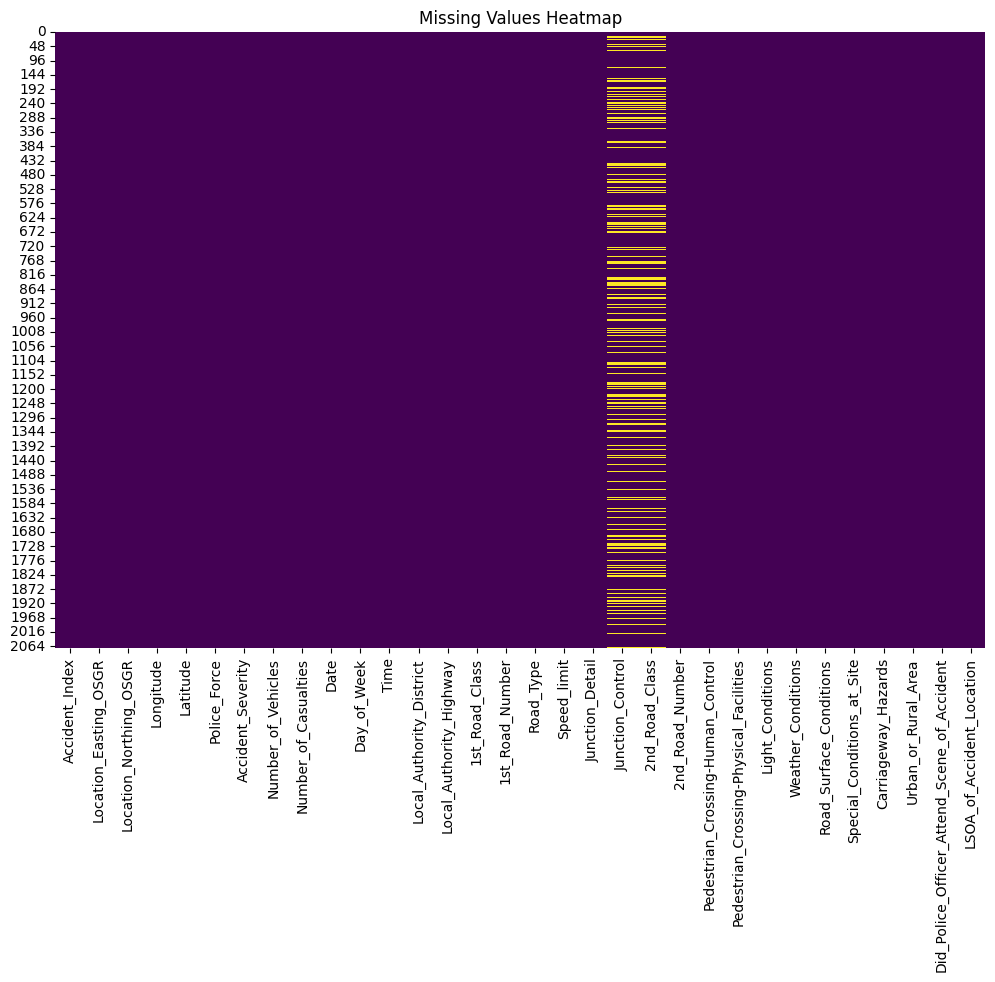

In [10]:
# Create a heatmap to visualize the missing values
plt.figure(figsize=(12, 8))
sns.heatmap(combined_mask, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [28]:
#Outliers
print(processed_df.shape)
# Select numeric variables
my_data_numeric = processed_df.select_dtypes(include='number')
print('The dataset has', len(my_data_numeric.columns),'Numeric variables:')
print(my_data_numeric)

# Select categorical variables
my_data_categorical = processed_df.select_dtypes(include='object')
print('The dataset has', len(my_data_categorical.columns),'Categorical variables:')
print(my_data_categorical)


(2070, 32)
The dataset has 6 Numeric variables:
      Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
0                    521760                  169840  -0.250492  51.414457   
1                    518140                  165370  -0.304009  51.375047   
2                    519130                  163980  -0.290258  51.362347   
3                    520840                  167190  -0.264617  51.390837   
4                    521280                  172110  -0.256614  51.434962   
...                     ...                     ...        ...        ...   
2065                 517330                  161850  -0.316802  51.343577   
2066                 517870                  169360  -0.306563  51.410965   
2067                 519370                  169000  -0.285126  51.407416   
2068                 519330                  169110  -0.285664  51.408413   
2069                 521830                  169870  -0.249475  51.414712   

      Number_of_Vehicles  N

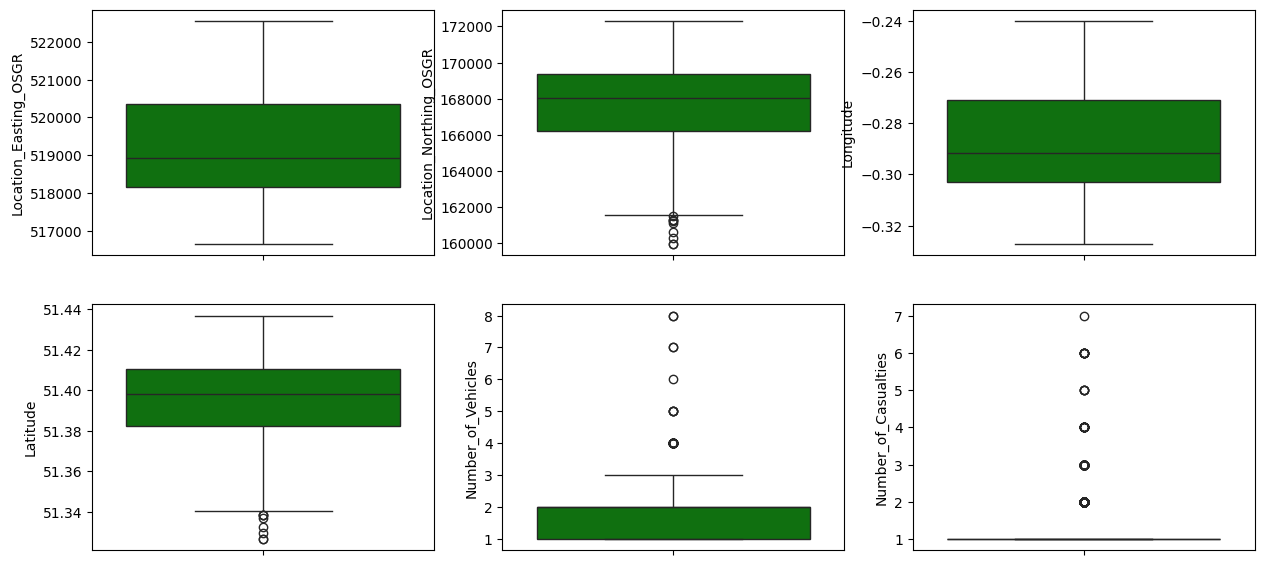

In [33]:
# Outliers - For numerics
fig = plt.figure(figsize= (15,30))

for i in range(len(my_data_numeric.columns)):
    column = my_data_numeric.columns[i]
    sub = fig.add_subplot(8,3,i+1)
    chart = sns.boxplot(data=my_data_numeric, y=column, color='g')

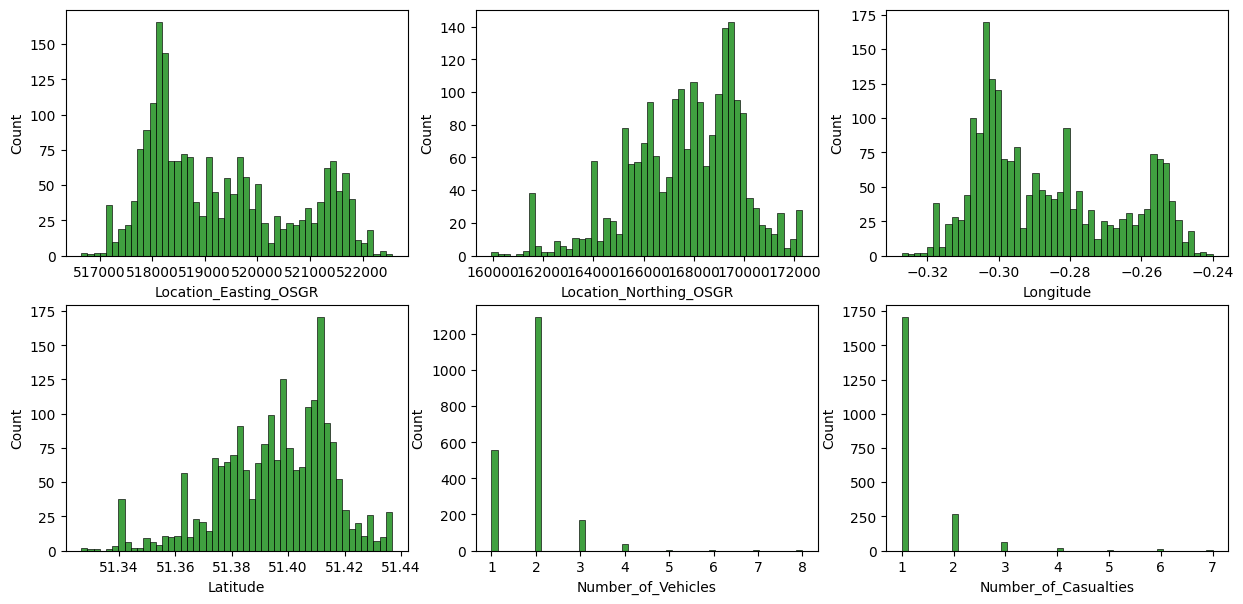

In [ ]:
# Use histogram for all the numeical variables
fig = plt.figure(figsize= (15,30))

for i in range(len(my_data_numeric.columns)):
    column = my_data_numeric.columns[i]
    sub = fig.add_subplot(8,3, i+1)
    chart = sns.histplot(data=my_data_numeric, x=column, bins=50, color='g', kde=False)

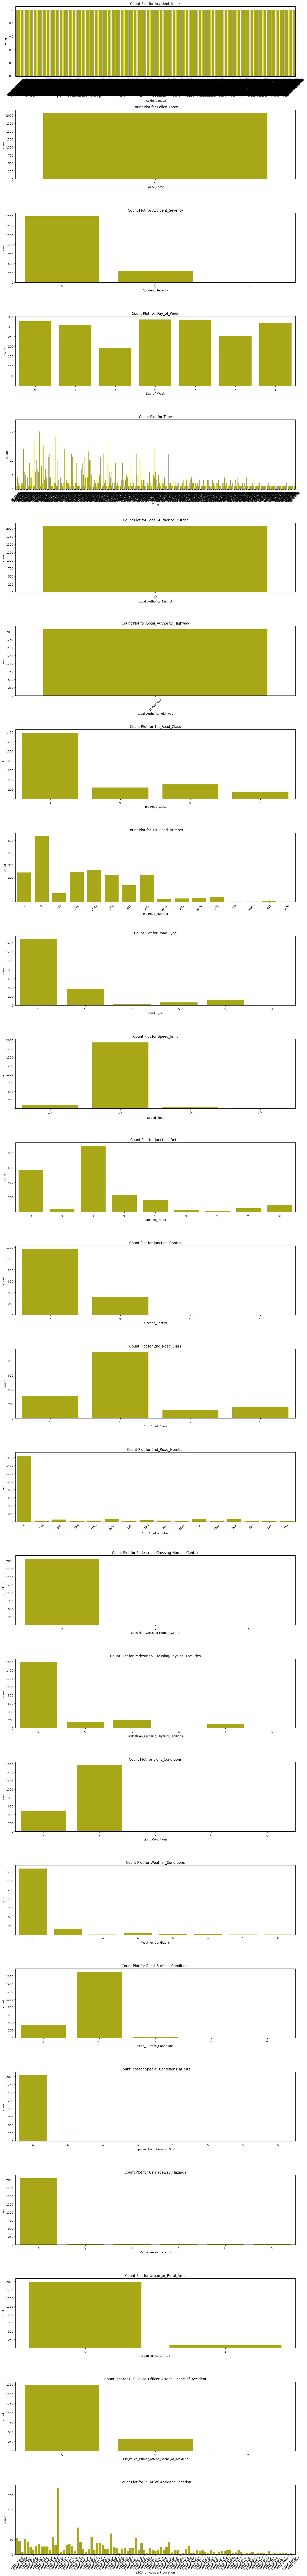

In [37]:
# Outliers - for categorical values
# Number of categorical variables
num_categorical = len(my_data_categorical.columns)

# Create a figure with enough rows
fig = plt.figure(figsize=(15, num_categorical * 5))  # Adjust height dynamically

for i, column in enumerate(my_data_categorical.columns):
    sub = fig.add_subplot(num_categorical, 1, i+1)  # Use the total number of plots
    sns.countplot(data=processed_df, x=column, color='y', ax=sub)  # Use ax=sub for subplot integration
    sub.set_title(f"Count Plot for {column}", fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary for clarity

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [40]:
#Tackle data quality issues
# Drop duplicates
processed_df = processed_df[processed_df.columns[~processed_df.columns.isin(['Location_Easting_OSGR', 'Location_Northing_OSGR'])]] # Drop two variables TOWN_No and CMEDV
processed_df

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501TE00016,-0.250492,51.414457,1,3,1,1,2005-01-13,5,07:25:00,...,0,0,4,1,2,0,0,1,1,E01002953
1,200501TE00017,-0.304009,51.375047,1,3,3,1,2005-01-18,3,08:35:00,...,0,0,1,1,2,0,0,1,1,E01003002
2,200501TE00026,-0.290258,51.362347,1,2,2,2,2005-01-09,1,01:17:00,...,0,0,4,1,1,0,0,1,1,E01002946
3,200501TE00039,-0.264617,51.390837,1,3,3,1,2005-01-23,1,18:00:00,...,0,0,4,1,1,0,0,1,1,E01002981
4,200501TE00060,-0.256614,51.434962,1,2,2,1,2005-01-21,6,06:20:00,...,0,0,4,1,1,0,0,1,1,E01002955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,201001VK30404,-0.316802,51.343577,1,3,2,1,2010-12-14,3,14:45:00,...,0,0,1,1,1,0,0,2,2,E01002948
2066,201001VK30408,-0.306563,51.410965,1,3,2,1,2010-12-22,4,16:10:00,...,0,5,4,1,1,0,0,1,1,E01002968
2067,201001VK30420,-0.285126,51.407416,1,3,2,1,2010-11-08,2,08:00:00,...,0,0,1,2,2,0,0,1,2,E01002969
2068,201001VK39057,-0.285664,51.408413,1,2,1,1,2010-05-17,2,18:45:00,...,0,4,1,1,1,0,6,1,1,E01002970


In [43]:
my_data_no_missing = processed_df.dropna()
my_data_no_missing.shape

(1500, 30)

In [55]:
numerical_cols = ['Number_of_Casualties', 'Longitude', 'Latitude']

# Remove outliers using IQR
outliers_index = []
for col in numerical_cols:
    Q1 = my_data_no_missing[col].quantile(0.25)
    Q3 = my_data_no_missing[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_index += my_data_no_missing.index[(my_data_no_missing[col] < lower_bound) | (my_data_no_missing[col] > upper_bound)].tolist()

# Drop rows with outliers
outliers_index = set(outliers_index)
my_data_cleaned = my_data_no_missing.drop(index=outliers_index)
my_data_cleaned.shape

(1242, 30)

In [ ]:
#analysis without outlier removing
light_conditions_count = my_data_cleaned['Light_Conditions'].value_counts(normalize=True)
print("Proportion of Light Conditions:")
print(light_conditions_count)

# Example: Analyzing Weather Conditions
weather_conditions_count = my_data_cleaned['Weather_Conditions'].value_counts(normalize=True)
print("Proportion of Weather Conditions:")
print(weather_conditions_count)

Proportion of Light Conditions:
Light_Conditions
1    0.773752
4    0.225443
7    0.000805
Name: proportion, dtype: float64
Proportion of Weather Conditions:
Weather_Conditions
1    0.903382
2    0.070853
8    0.013688
4    0.005636
5    0.002415
7    0.002415
3    0.001610
Name: proportion, dtype: float64


In [47]:
# Filter rows for serious and fatal accidents
serious_accidents = my_data_cleaned[my_data_cleaned['Accident_Severity'].isin(['Serious', 'Fatal'])]

# Analyze Weather Conditions for serious accidents
serious_weather = serious_accidents['Weather_Conditions'].value_counts(normalize=True)
print("Weather Conditions for Serious/Fatal Accidents:")
print(serious_weather)

# Analyze Road Surface Conditions for serious accidents
serious_road_surface = serious_accidents['Road_Surface_Conditions'].value_counts(normalize=True)
print("Road Surface Conditions for Serious/Fatal Accidents:")
print(serious_road_surface)

Weather Conditions for Serious/Fatal Accidents:
Series([], Name: proportion, dtype: float64)
Road Surface Conditions for Serious/Fatal Accidents:
Series([], Name: proportion, dtype: float64)


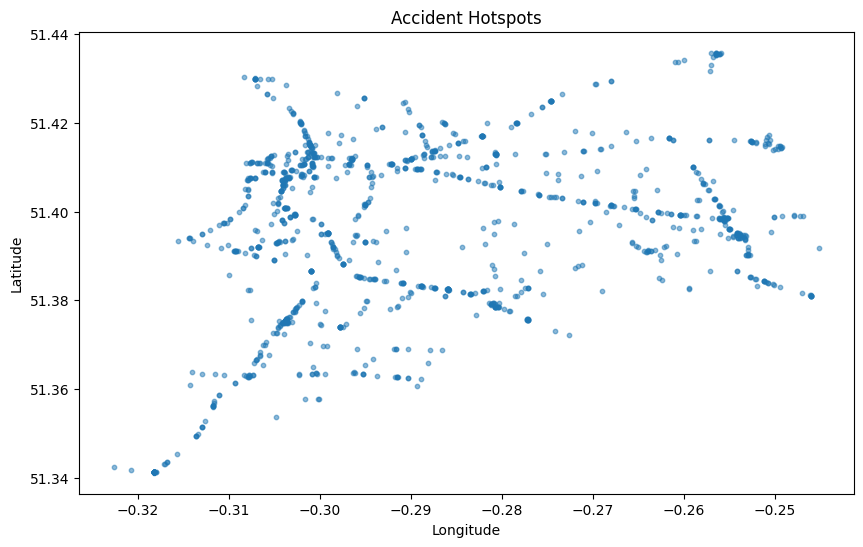

In [48]:
# Plot accident hotspots
plt.figure(figsize=(10, 6))
plt.scatter(my_data_cleaned['Longitude'], my_data_cleaned['Latitude'], alpha=0.5, s=10)
plt.title("Accident Hotspots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [51]:
import folium

# Create a base map centered around the mean location
center_lat = my_data_cleaned['Latitude'].mean()
center_lon = my_data_cleaned['Longitude'].mean()
map_hotspots = folium.Map(location=[center_lat, center_lon], zoom_start=13)

# Add individual markers for each accident location
for _, row in my_data_cleaned.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,  # Radius of the marker
        color='blue',  # Border color of the circle
        fill=True,
        fill_color='blue',  # Fill color of the circle
        fill_opacity=0.6  # Opacity of the marker
    ).add_to(map_hotspots)

# Display the map
map_hotspots

In [49]:
import folium
from folium.plugins import MarkerCluster

# Create a base map centered around the mean latitude and longitude
center_lat = my_data_cleaned['Latitude'].mean()
center_lon = my_data_cleaned['Longitude'].mean()
map_hotspots = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Create a marker cluster to group nearby accidents
marker_cluster = MarkerCluster().add_to(map_hotspots)

# Add markers for each accident location
for _, row in my_data_cleaned.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']]).add_to(marker_cluster)

# Display the map
map_hotspots


(1242, 30)


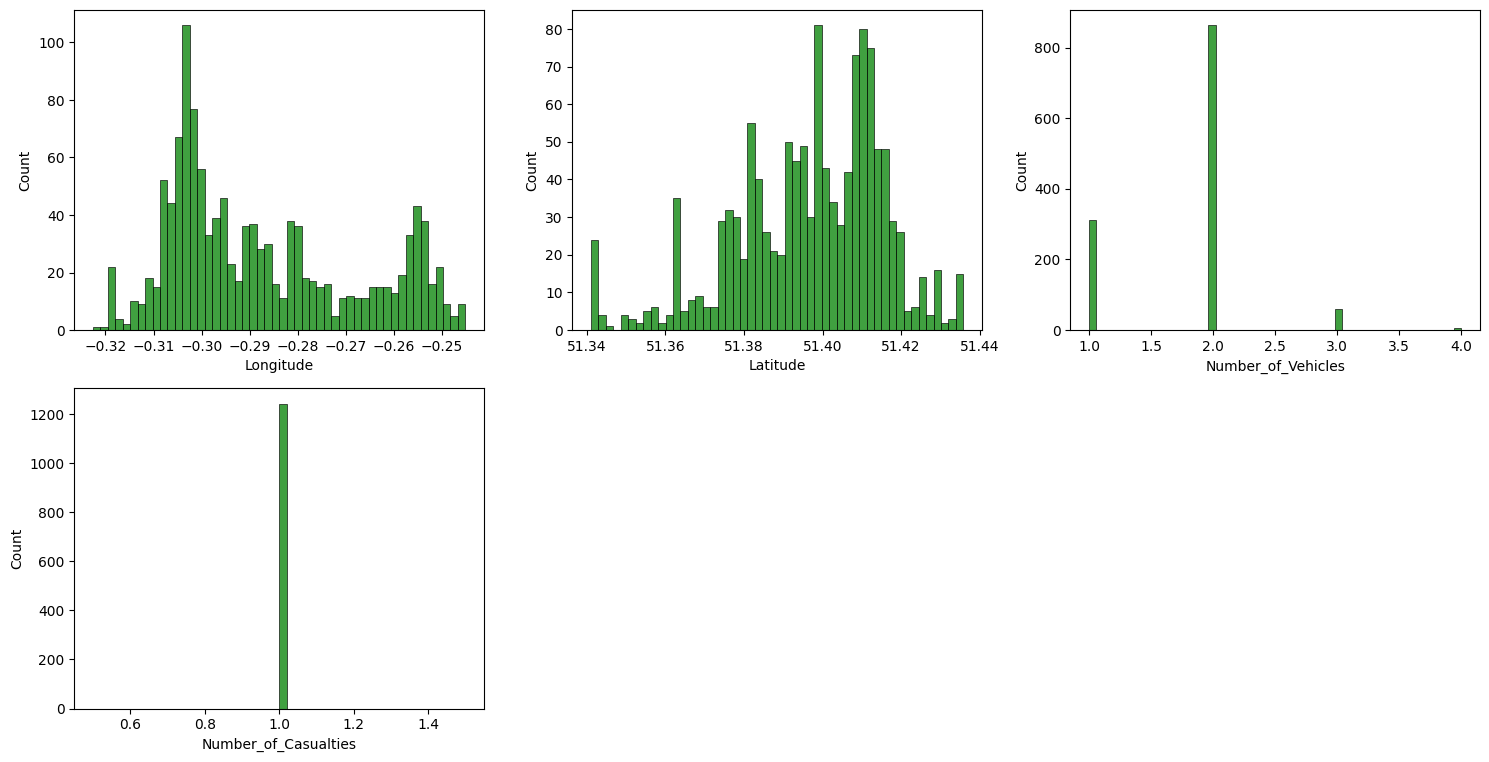

In [56]:
print(my_data_cleaned.shape)
fig = plt.figure(figsize=(15, 30))

# Filter numeric columns
numeric_cols = my_data_cleaned.select_dtypes(include='number').columns

for i, column in enumerate(numeric_cols):
    sub = fig.add_subplot(8, 3, i + 1)
    chart = sns.histplot(data=my_data_cleaned, x=column, bins=50, color='g', kde=False)

plt.tight_layout()
plt.show()


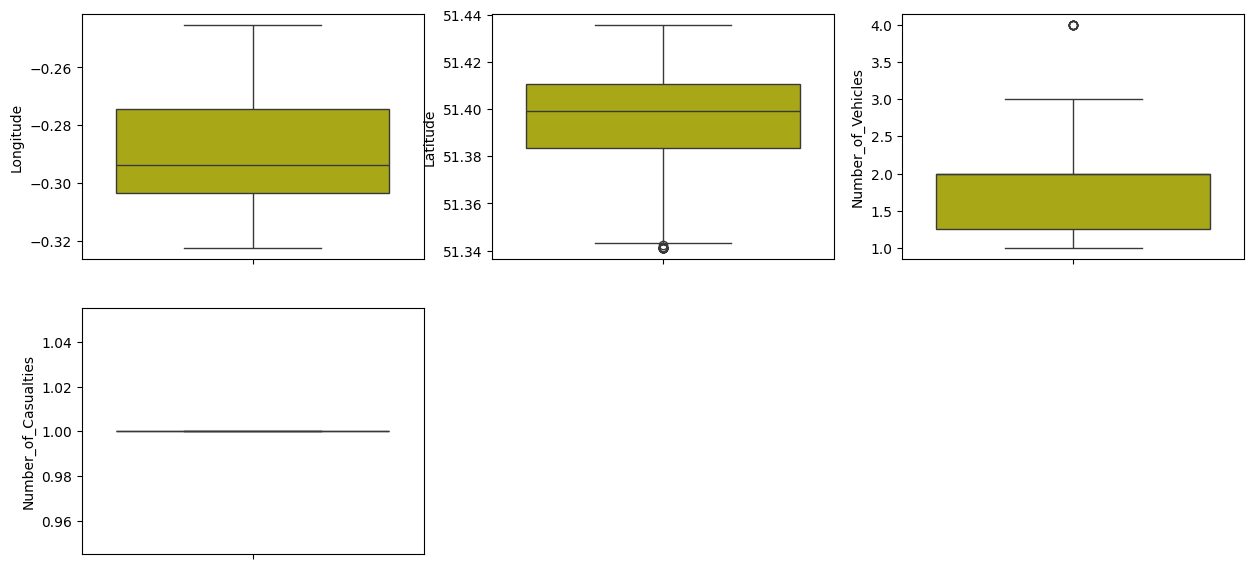

In [59]:
# Plot Boxplot after IQR applied
fig = plt.figure(figsize=(15, 30))

my_data = my_data_cleaned.select_dtypes(include='number')

for i in range(len(my_data.columns)):
    column = my_data.columns[i]
    sub = fig.add_subplot(8, 3, i + 1)
    chart = sns.boxplot(data=my_data, y=column, color='y')

Class distribution for Police_Force:
Police_Force
1    100.0
Name: proportion, dtype: float64



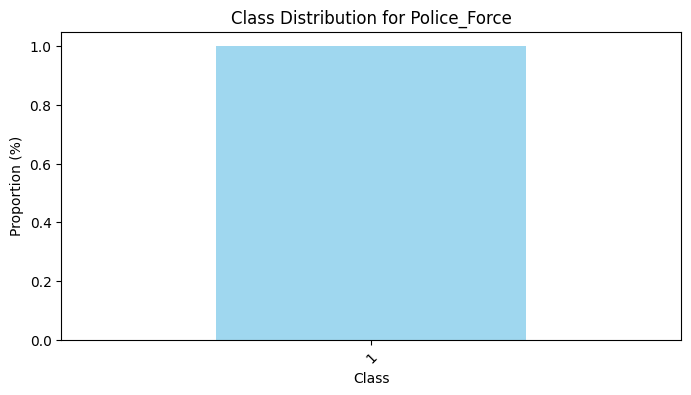

Class distribution for Accident_Severity:
Accident_Severity
3    85.507246
2    14.009662
1     0.483092
Name: proportion, dtype: float64



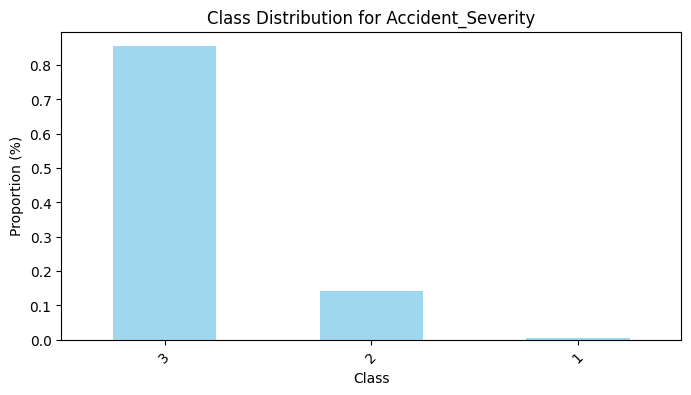

Class distribution for Day_of_Week:
Day_of_Week
6    16.988728
3    15.942029
5    15.700483
2    15.539452
4    15.539452
7    11.594203
1     8.695652
Name: proportion, dtype: float64



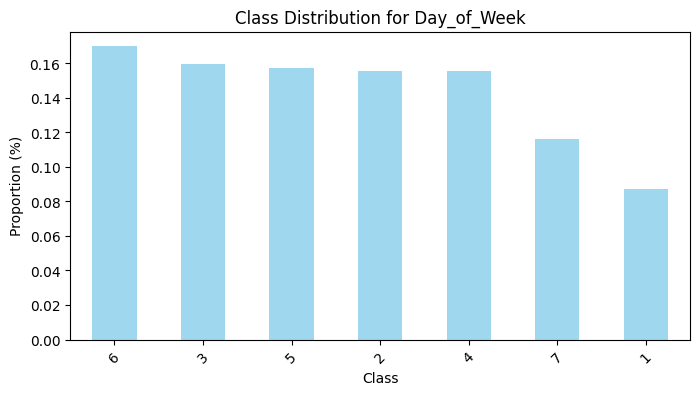

Class distribution for Local_Authority_District:
Local_Authority_District
23    100.0
Name: proportion, dtype: float64



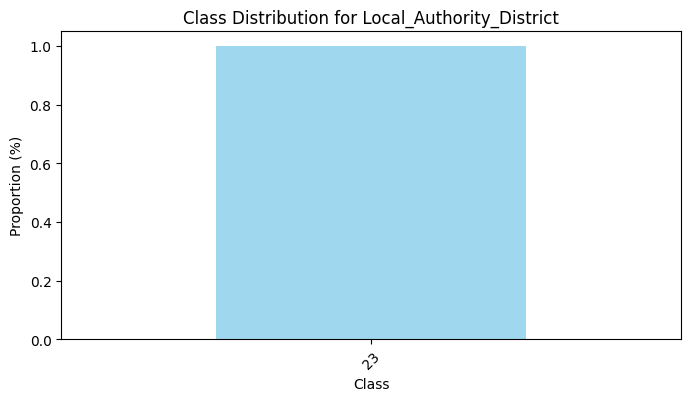

Class distribution for Local_Authority_Highway:
Local_Authority_Highway
E09000021    100.0
Name: proportion, dtype: float64



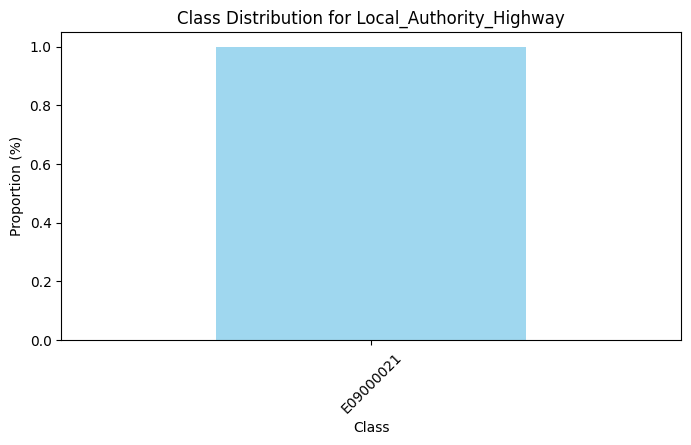

Class distribution for 1st_Road_Class:
1st_Road_Class
3    67.713366
6    13.446055
5    11.513688
4     7.326892
Name: proportion, dtype: float64



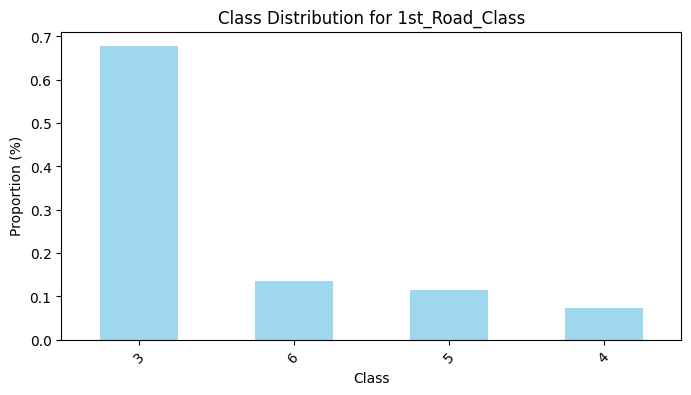

Class distribution for Road_Type:
Road_Type
6    73.752013
3    12.560386
1     8.695652
2     2.979066
7     1.932367
9     0.080515
Name: proportion, dtype: float64



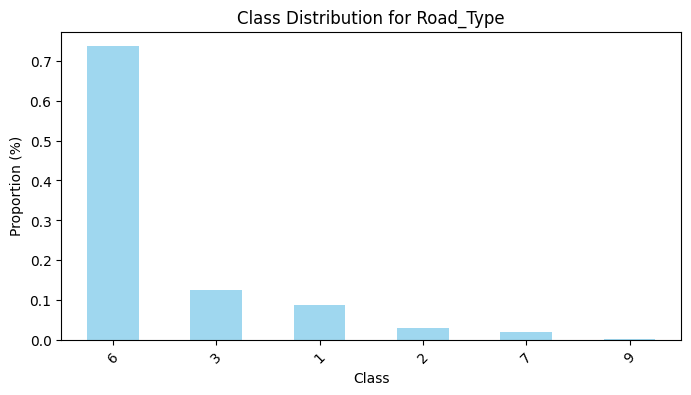

Class distribution for Speed_limit:
Speed_limit
30    97.020934
50     1.449275
40     1.127214
20     0.402576
Name: proportion, dtype: float64



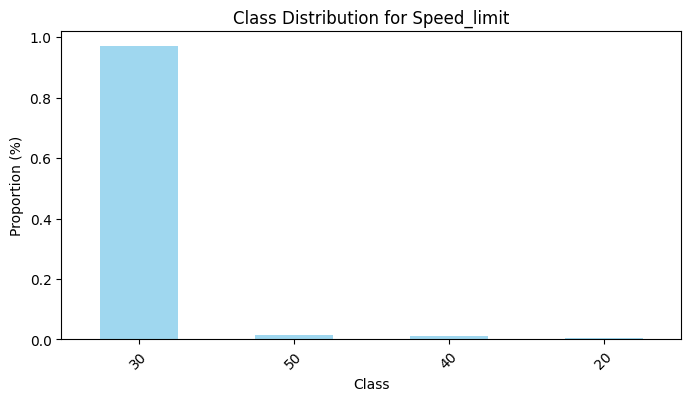

Class distribution for Junction_Detail:
Junction_Detail
3    61.191626
6    13.929147
1    11.433172
8     5.636071
7     3.220612
5     2.415459
2     2.012882
9     0.161031
Name: proportion, dtype: float64



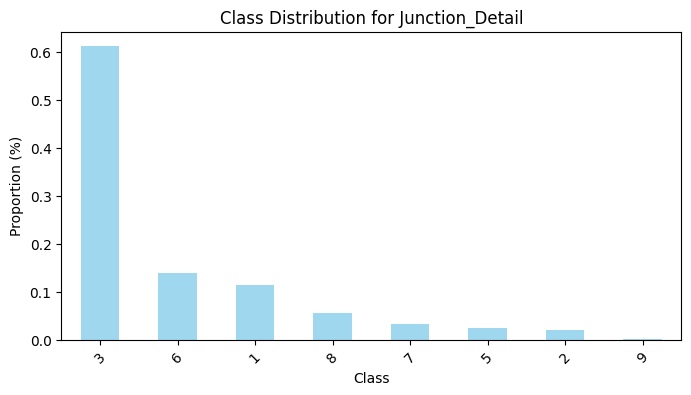

Class distribution for Junction_Control:
Junction_Control
4    79.951691
2    19.967794
1     0.080515
Name: proportion, dtype: float64



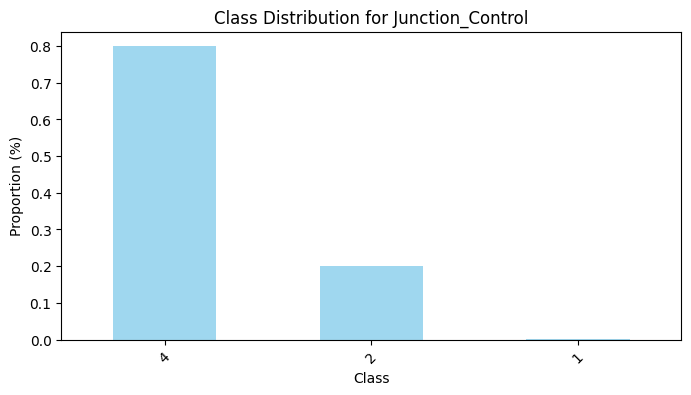

Class distribution for 2nd_Road_Class:
2nd_Road_Class
6    61.835749
3    20.370370
5    10.547504
4     7.246377
Name: proportion, dtype: float64



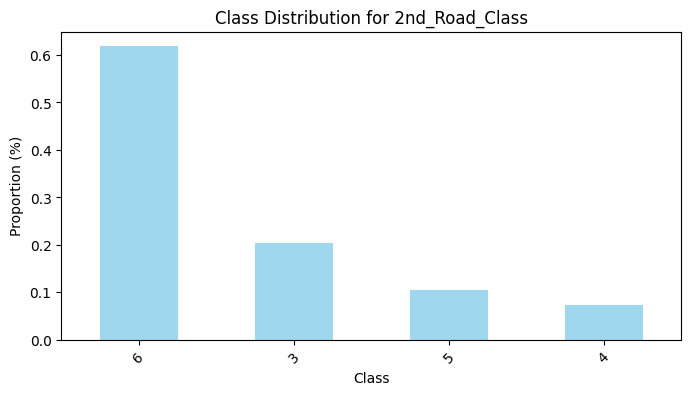

Class distribution for Pedestrian_Crossing-Human_Control:
Pedestrian_Crossing-Human_Control
0    99.838969
2     0.161031
Name: proportion, dtype: float64



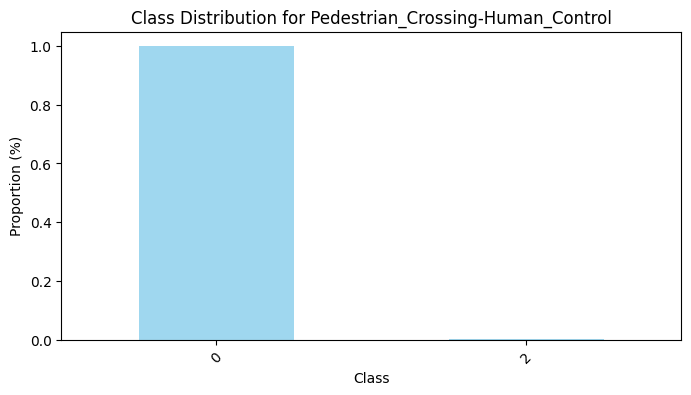

Class distribution for Pedestrian_Crossing-Physical_Facilities:
Pedestrian_Crossing-Physical_Facilities
0    73.107890
5    12.318841
1     8.373591
4     5.716586
8     0.322061
7     0.161031
Name: proportion, dtype: float64



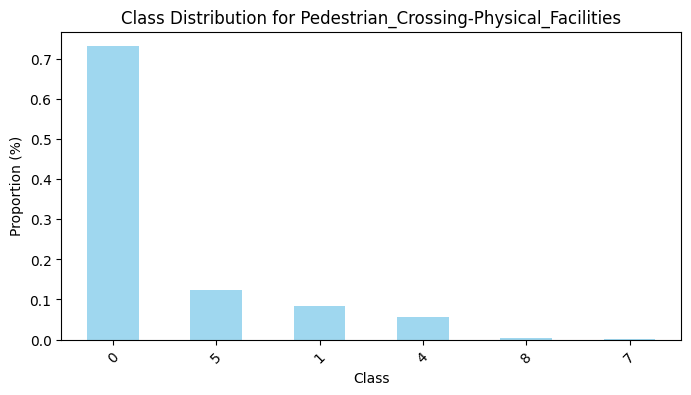

Class distribution for Light_Conditions:
Light_Conditions
1    77.375201
4    22.544283
7     0.080515
Name: proportion, dtype: float64



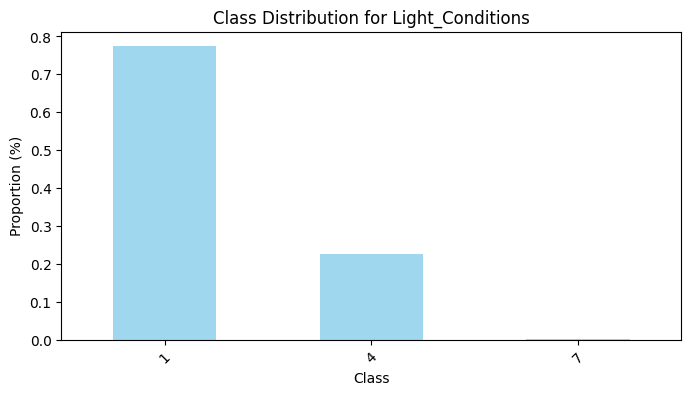

Class distribution for Weather_Conditions:
Weather_Conditions
1    90.338164
2     7.085346
8     1.368760
4     0.563607
5     0.241546
7     0.241546
3     0.161031
Name: proportion, dtype: float64



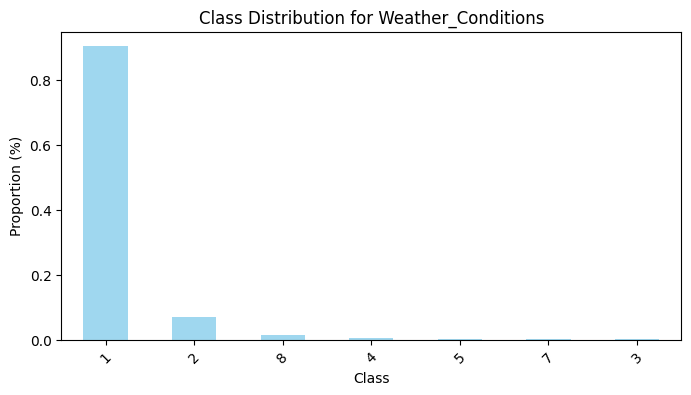

Class distribution for Road_Surface_Conditions:
Road_Surface_Conditions
1    84.943639
2    14.170692
4     0.724638
3     0.161031
Name: proportion, dtype: float64



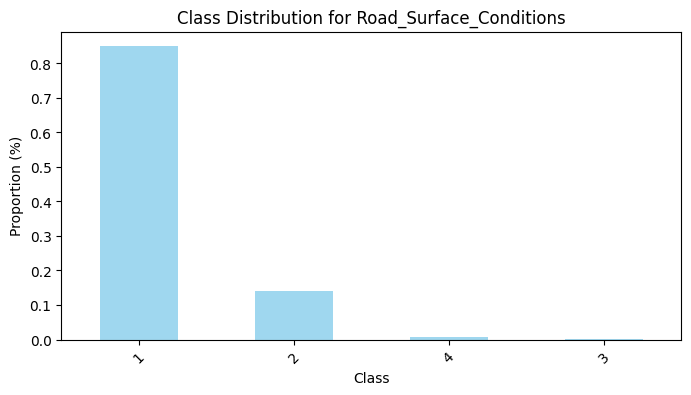

Class distribution for Special_Conditions_at_Site:
Special_Conditions_at_Site
0    98.872786
4     0.563607
6     0.241546
5     0.080515
7     0.080515
1     0.080515
3     0.080515
Name: proportion, dtype: float64



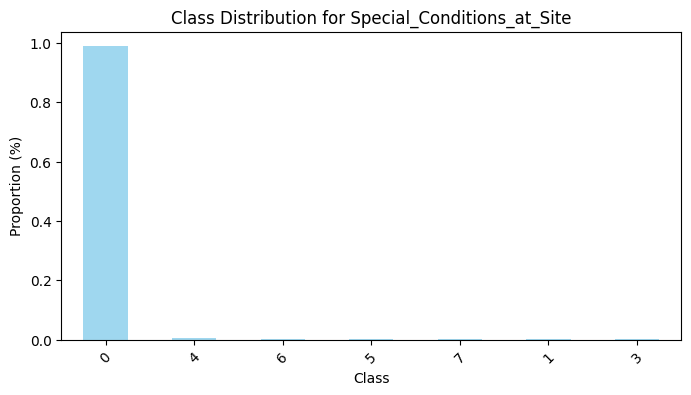

Class distribution for Carriageway_Hazards:
Carriageway_Hazards
0    99.516908
7     0.241546
1     0.161031
6     0.080515
Name: proportion, dtype: float64



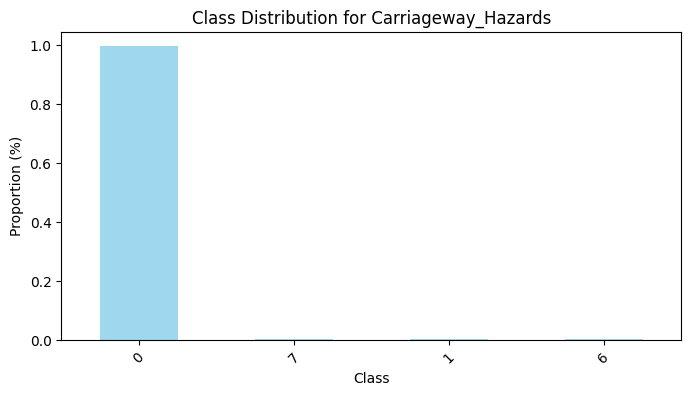

Class distribution for Urban_or_Rural_Area:
Urban_or_Rural_Area
1    96.859903
2     3.140097
Name: proportion, dtype: float64



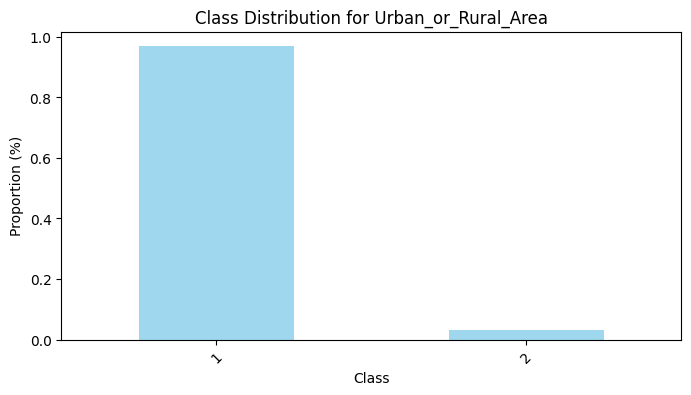

Class distribution for Did_Police_Officer_Attend_Scene_of_Accident:
Did_Police_Officer_Attend_Scene_of_Accident
1    81.803543
2    17.471820
3     0.724638
Name: proportion, dtype: float64



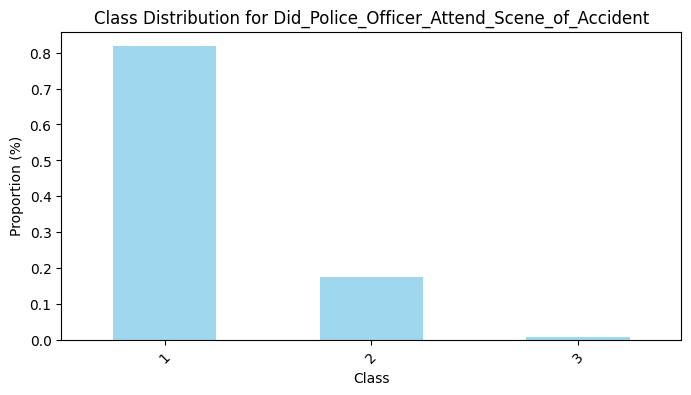

Class distribution for LSOA_of_Accident_Location:
LSOA_of_Accident_Location
E01002968    11.272142
E01002984     4.186795
E01002948     3.784219
E01003003     3.301127
E01002936     2.737520
               ...    
E01003445     0.080515
E01002943     0.080515
E01003005     0.080515
E01002983     0.080515
E01002934     0.080515
Name: proportion, Length: 95, dtype: float64



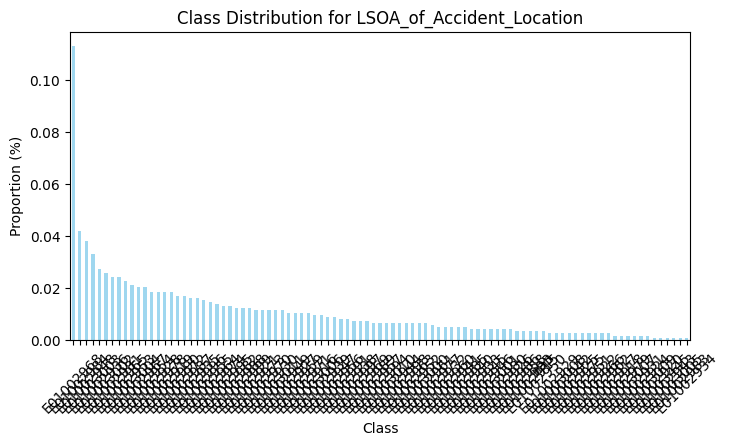

In [62]:
# List of categorical columns
categorical_cols = [
    'Police_Force', 'Accident_Severity', 'Day_of_Week', 'Local_Authority_District',
    'Local_Authority_Highway', '1st_Road_Class', 'Road_Type', 'Speed_limit',
    'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
    'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities',
    'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions',
    'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area',
    'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location'
]

# Analyze and visualize distributions
for col in categorical_cols:
    print(f"Class distribution for {col}:")
    print(my_data_cleaned[col].value_counts(normalize=True) * 100)  # Print proportions
    print()

    # Plot class distribution
    plt.figure(figsize=(8, 4))
    my_data_cleaned[col].value_counts(normalize=True).plot(
        kind='bar', color='skyblue', alpha=0.8
    )
    plt.title(f"Class Distribution for {col}")
    plt.xlabel("Class")
    plt.ylabel("Proportion (%)")
    plt.xticks(rotation=45)
    plt.show()

Statistics for Police_Force:

Counts:
Police_Force
1    1242
Name: count, dtype: int64
Proportions (%):
Police_Force
1    100.0
Name: proportion, dtype: float64
Mode: 1



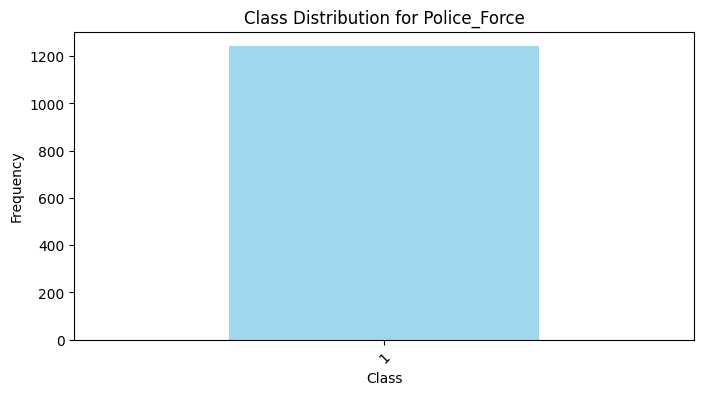

Statistics for Accident_Severity:

Counts:
Accident_Severity
3    1062
2     174
1       6
Name: count, dtype: int64
Proportions (%):
Accident_Severity
3    85.507246
2    14.009662
1     0.483092
Name: proportion, dtype: float64
Mode: 3



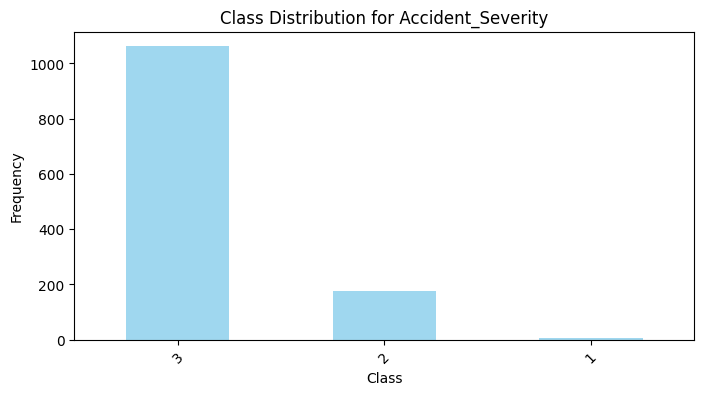

Statistics for Day_of_Week:

Counts:
Day_of_Week
6    211
3    198
5    195
2    193
4    193
7    144
1    108
Name: count, dtype: int64
Proportions (%):
Day_of_Week
6    16.988728
3    15.942029
5    15.700483
2    15.539452
4    15.539452
7    11.594203
1     8.695652
Name: proportion, dtype: float64
Mode: 6



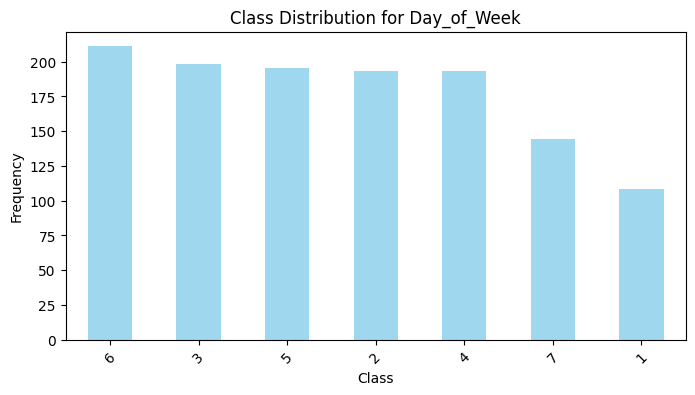

Statistics for Local_Authority_District:

Counts:
Local_Authority_District
23    1242
Name: count, dtype: int64
Proportions (%):
Local_Authority_District
23    100.0
Name: proportion, dtype: float64
Mode: 23



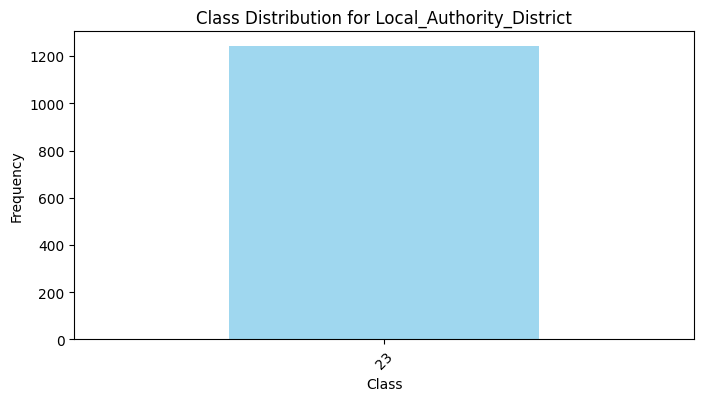

Statistics for Local_Authority_Highway:

Counts:
Local_Authority_Highway
E09000021    1242
Name: count, dtype: int64
Proportions (%):
Local_Authority_Highway
E09000021    100.0
Name: proportion, dtype: float64
Mode: E09000021



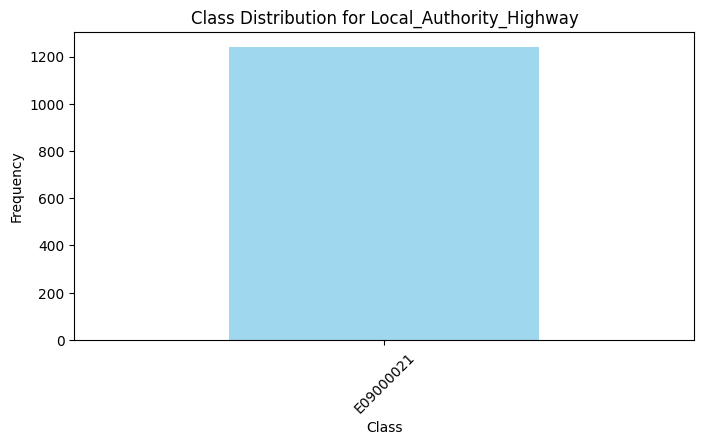

Statistics for 1st_Road_Class:

Counts:
1st_Road_Class
3    841
6    167
5    143
4     91
Name: count, dtype: int64
Proportions (%):
1st_Road_Class
3    67.713366
6    13.446055
5    11.513688
4     7.326892
Name: proportion, dtype: float64
Mode: 3



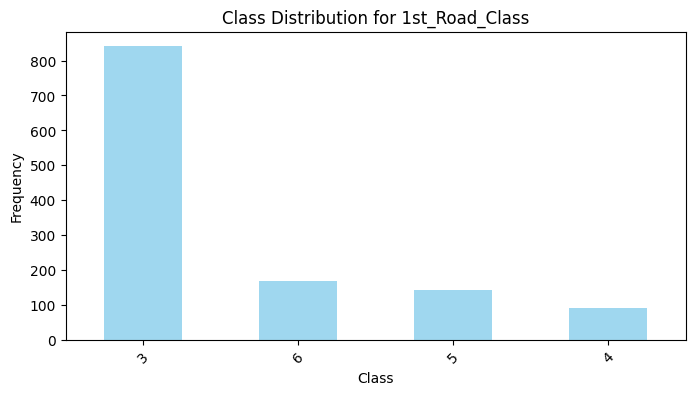

Statistics for Road_Type:

Counts:
Road_Type
6    916
3    156
1    108
2     37
7     24
9      1
Name: count, dtype: int64
Proportions (%):
Road_Type
6    73.752013
3    12.560386
1     8.695652
2     2.979066
7     1.932367
9     0.080515
Name: proportion, dtype: float64
Mode: 6



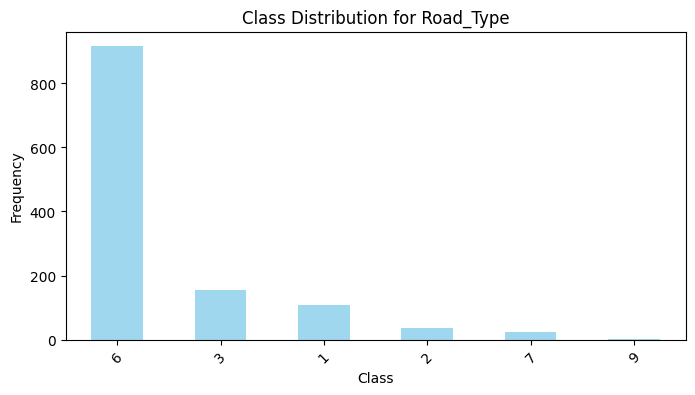

Statistics for Speed_limit:

Counts:
Speed_limit
30    1205
50      18
40      14
20       5
Name: count, dtype: int64
Proportions (%):
Speed_limit
30    97.020934
50     1.449275
40     1.127214
20     0.402576
Name: proportion, dtype: float64
Mode: 30



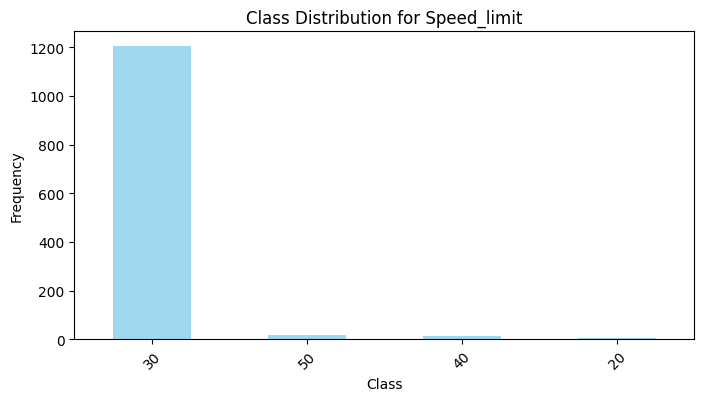

Statistics for Junction_Detail:

Counts:
Junction_Detail
3    760
6    173
1    142
8     70
7     40
5     30
2     25
9      2
Name: count, dtype: int64
Proportions (%):
Junction_Detail
3    61.191626
6    13.929147
1    11.433172
8     5.636071
7     3.220612
5     2.415459
2     2.012882
9     0.161031
Name: proportion, dtype: float64
Mode: 3



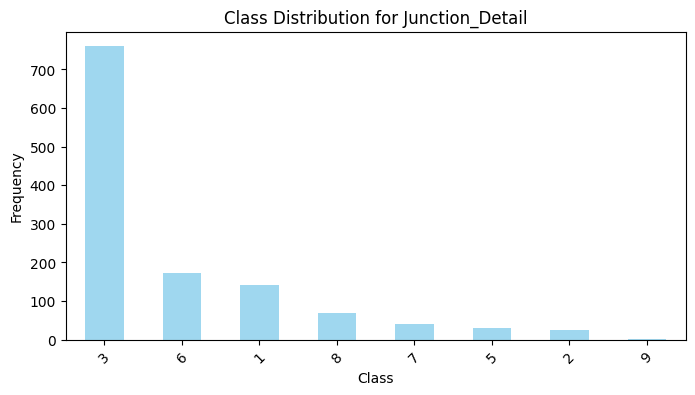

Statistics for Junction_Control:

Counts:
Junction_Control
4    993
2    248
1      1
Name: count, dtype: int64
Proportions (%):
Junction_Control
4    79.951691
2    19.967794
1     0.080515
Name: proportion, dtype: float64
Mode: 4



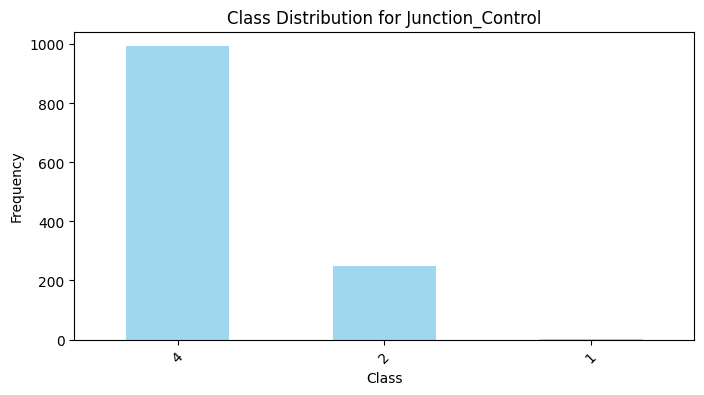

Statistics for 2nd_Road_Class:

Counts:
2nd_Road_Class
6    768
3    253
5    131
4     90
Name: count, dtype: int64
Proportions (%):
2nd_Road_Class
6    61.835749
3    20.370370
5    10.547504
4     7.246377
Name: proportion, dtype: float64
Mode: 6



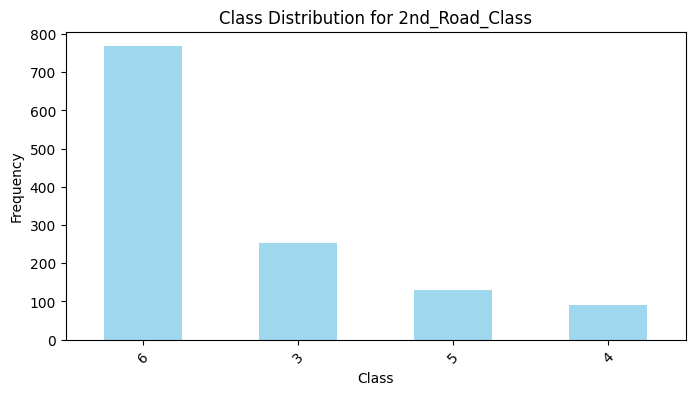

Statistics for Pedestrian_Crossing-Human_Control:

Counts:
Pedestrian_Crossing-Human_Control
0    1240
2       2
Name: count, dtype: int64
Proportions (%):
Pedestrian_Crossing-Human_Control
0    99.838969
2     0.161031
Name: proportion, dtype: float64
Mode: 0



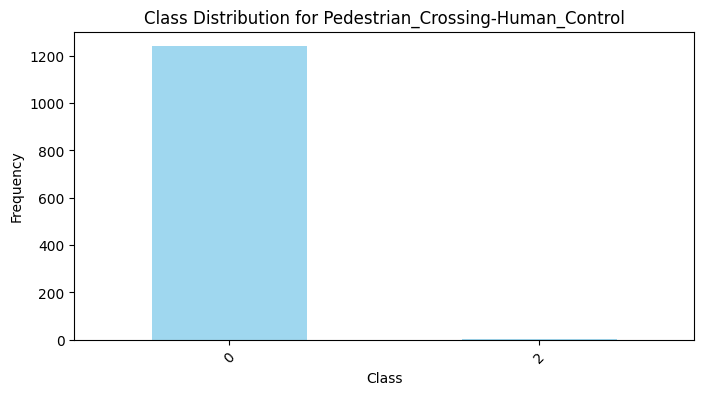

Statistics for Pedestrian_Crossing-Physical_Facilities:

Counts:
Pedestrian_Crossing-Physical_Facilities
0    908
5    153
1    104
4     71
8      4
7      2
Name: count, dtype: int64
Proportions (%):
Pedestrian_Crossing-Physical_Facilities
0    73.107890
5    12.318841
1     8.373591
4     5.716586
8     0.322061
7     0.161031
Name: proportion, dtype: float64
Mode: 0



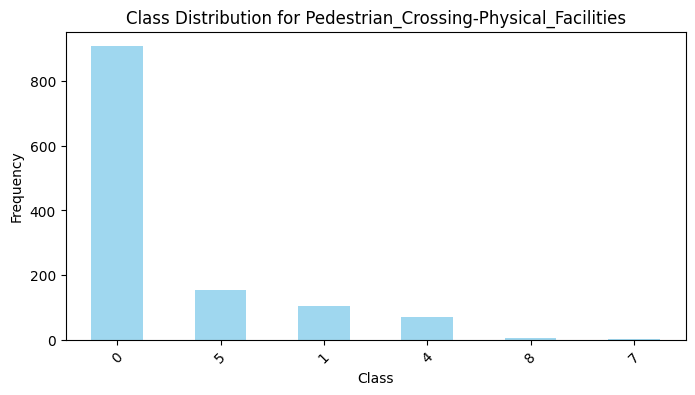

Statistics for Light_Conditions:

Counts:
Light_Conditions
1    961
4    280
7      1
Name: count, dtype: int64
Proportions (%):
Light_Conditions
1    77.375201
4    22.544283
7     0.080515
Name: proportion, dtype: float64
Mode: 1



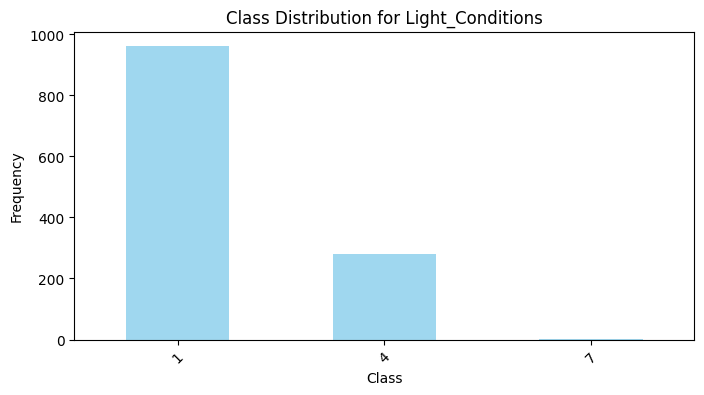

Statistics for Weather_Conditions:

Counts:
Weather_Conditions
1    1122
2      88
8      17
4       7
5       3
7       3
3       2
Name: count, dtype: int64
Proportions (%):
Weather_Conditions
1    90.338164
2     7.085346
8     1.368760
4     0.563607
5     0.241546
7     0.241546
3     0.161031
Name: proportion, dtype: float64
Mode: 1



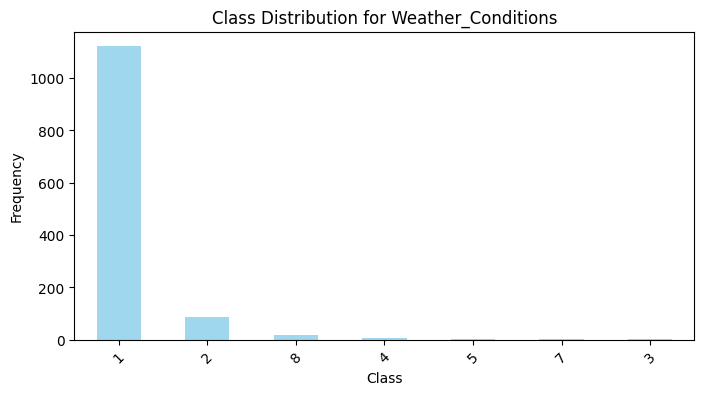

Statistics for Road_Surface_Conditions:

Counts:
Road_Surface_Conditions
1    1055
2     176
4       9
3       2
Name: count, dtype: int64
Proportions (%):
Road_Surface_Conditions
1    84.943639
2    14.170692
4     0.724638
3     0.161031
Name: proportion, dtype: float64
Mode: 1



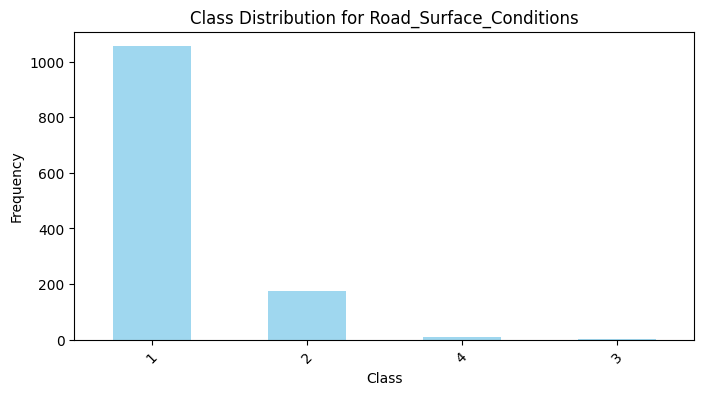

Statistics for Special_Conditions_at_Site:

Counts:
Special_Conditions_at_Site
0    1228
4       7
6       3
5       1
7       1
1       1
3       1
Name: count, dtype: int64
Proportions (%):
Special_Conditions_at_Site
0    98.872786
4     0.563607
6     0.241546
5     0.080515
7     0.080515
1     0.080515
3     0.080515
Name: proportion, dtype: float64
Mode: 0



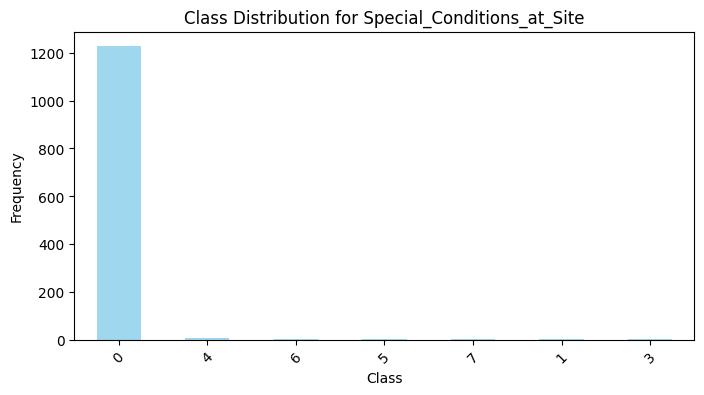

Statistics for Carriageway_Hazards:

Counts:
Carriageway_Hazards
0    1236
7       3
1       2
6       1
Name: count, dtype: int64
Proportions (%):
Carriageway_Hazards
0    99.516908
7     0.241546
1     0.161031
6     0.080515
Name: proportion, dtype: float64
Mode: 0



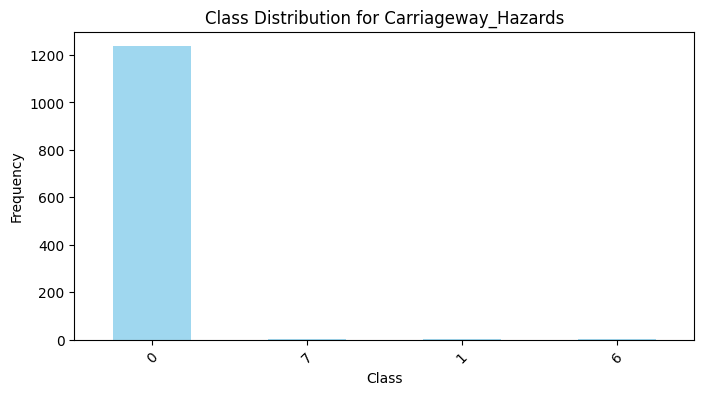

Statistics for Urban_or_Rural_Area:

Counts:
Urban_or_Rural_Area
1    1203
2      39
Name: count, dtype: int64
Proportions (%):
Urban_or_Rural_Area
1    96.859903
2     3.140097
Name: proportion, dtype: float64
Mode: 1



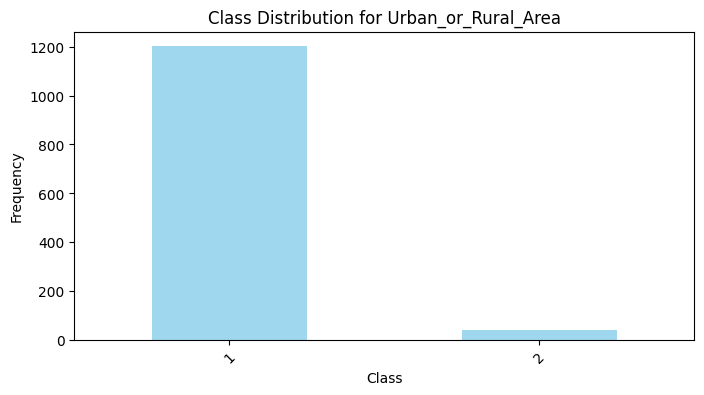

Statistics for Did_Police_Officer_Attend_Scene_of_Accident:

Counts:
Did_Police_Officer_Attend_Scene_of_Accident
1    1016
2     217
3       9
Name: count, dtype: int64
Proportions (%):
Did_Police_Officer_Attend_Scene_of_Accident
1    81.803543
2    17.471820
3     0.724638
Name: proportion, dtype: float64
Mode: 1



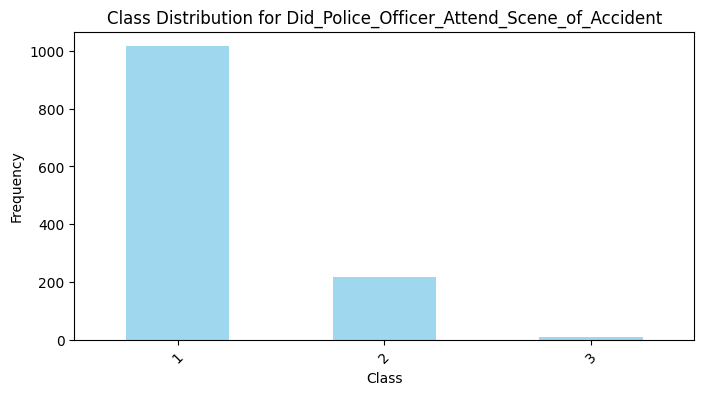

Statistics for LSOA_of_Accident_Location:

Counts:
LSOA_of_Accident_Location
E01002968    140
E01002984     52
E01002948     47
E01003003     41
E01002936     34
            ... 
E01003445      1
E01002943      1
E01003005      1
E01002983      1
E01002934      1
Name: count, Length: 95, dtype: int64
Proportions (%):
LSOA_of_Accident_Location
E01002968    11.272142
E01002984     4.186795
E01002948     3.784219
E01003003     3.301127
E01002936     2.737520
               ...    
E01003445     0.080515
E01002943     0.080515
E01003005     0.080515
E01002983     0.080515
E01002934     0.080515
Name: proportion, Length: 95, dtype: float64
Mode: E01002968



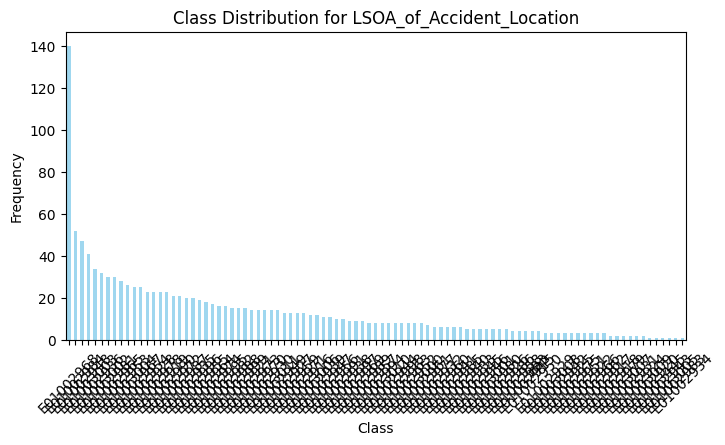

In [63]:
#Explore basic statistics of each attribute
categorical_cols = [
    'Police_Force', 'Accident_Severity', 'Day_of_Week', 'Local_Authority_District',
    'Local_Authority_Highway', '1st_Road_Class', 'Road_Type', 'Speed_limit',
    'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
    'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities',
    'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions',
    'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area',
    'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location'
]

for col in categorical_cols:
    print(f"Statistics for {col}:\n")
    
    # Frequency counts and proportions
    counts = my_data_cleaned[col].value_counts()
    proportions = my_data_cleaned[col].value_counts(normalize=True)
    
    # Mode (most frequent value)
    mode = my_data_cleaned[col].mode()[0]
    
    print(f"Counts:\n{counts}")
    print(f"Proportions (%):\n{proportions * 100}")
    print(f"Mode: {mode}\n")
    
    # Visualization: Bar plot for class distributions
    plt.figure(figsize=(8, 4))
    counts.plot(kind='bar', color='skyblue', alpha=0.8)
    plt.title(f"Class Distribution for {col}")
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

In [64]:
from scipy.stats import skew, kurtosis

# Select numerical columns (if any categorical columns are numeric in nature)
numerical_cols = my_data_cleaned[categorical_cols].select_dtypes(include='number').columns

for col in numerical_cols:
    print(f"Statistics for {col}:\n")
    
    # Calculate statistics
    value_range = (my_data_cleaned[col].min(), my_data_cleaned[col].max())
    avg = my_data_cleaned[col].mean()
    std_dev = my_data_cleaned[col].std()
    skewness = skew(my_data_cleaned[col])
    kurt = kurtosis(my_data_cleaned[col])
    mode = my_data_cleaned[col].mode()[0]
    
    print(f"Range: {value_range}")
    print(f"Mean: {avg}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurt}")
    print(f"Mode: {mode}\n")
    
    # Visualization: Histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(my_data_cleaned[col], bins=30, color='skyblue', kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()